In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your EV dataset
# Replace 'your_dataset.csv' with the actual file path or URL
df = pd.read_csv('/content/RS_Session_256_AU_2673_2.i.csv')

In [3]:
# Display the first few rows of the dataset
print(df.head())

       State Name  No. of EV Chargers Sanctioned
0     Maharashtra                            317
1  Andhra Pradesh                            266
2      Tamil Nadu                            281
3         Gujarat                            278
4   Uttar Pradesh                            207


In [4]:
# Summary statistics
print(df.describe())

       No. of EV Chargers Sanctioned
count                      26.000000
mean                      221.307692
std                       551.474806
min                        10.000000
25%                        25.000000
50%                        71.000000
75%                       210.000000
max                      2877.000000


In [5]:
# Check for missing values
print(df.isnull().sum())

State Name                       0
No. of EV Chargers Sanctioned    0
dtype: int64


In [6]:
print("Missing values before cleaning:")
print(df.isnull().sum())

# Handle missing values
# Example: Drop rows with missing values, you can choose other strategies based on your dataset
df = df.dropna()

# Display the number of missing values after handling
print("\nMissing values after handling:")
print(df.isnull().sum())

# Handling outliers using z-score
from scipy.stats import zscore
z_scores = zscore(df.select_dtypes(include=['float64']))
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

# Display the shape of the dataset after handling outliers
print("\nShape after handling outliers:")
print(df.shape)

Missing values before cleaning:
State Name                       0
No. of EV Chargers Sanctioned    0
dtype: int64

Missing values after handling:
State Name                       0
No. of EV Chargers Sanctioned    0
dtype: int64

Shape after handling outliers:
(26, 2)


In [7]:
print(df.columns)

Index(['State Name', 'No. of EV Chargers Sanctioned'], dtype='object')


In [8]:
print(df)

                          State Name  No. of EV Chargers Sanctioned
0                        Maharashtra                            317
1                     Andhra Pradesh                            266
2                         Tamil Nadu                            281
3                            Gujarat                            278
4                      Uttar Pradesh                            207
5                          Rajasthan                            205
6                          Karnataka                            172
7                     Madhya Pradesh                            235
8                        West Bengal                            141
9                          Telangana                            138
10                            Kerala                            211
11                             Delhi                             72
12                        Chandigarh                             70
13                           Haryana            

In [9]:
# Display columns with commas in numeric values
columns_with_commas = []

for column in df.columns:
    if df[column].dtype == 'object' and any(df[column].str.contains(',')):
        columns_with_commas.append(column)

print("Columns with Commas in Numeric Values:\n", columns_with_commas)


Columns with Commas in Numeric Values:
 []


In [10]:
display(df)

,State Name,No. of EV Chargers Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,281
3,Gujarat,278
4,Uttar Pradesh,207
5,Rajasthan,205
6,Karnataka,172
7,Madhya Pradesh,235
8,West Bengal,141
9,Telangana,138


In [11]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Drop the row with index 'row_index'
df.drop(25, inplace=True)


In [12]:
'''
# Display the df types of each column
print("Data Types Before Correction:\n", df.dtypes)

# List of columns containing numeric values with commas to be converted
columns_with_commas = ['State Name', 'No. of EV Chargers Sanctioned']

# Convert columns with commas to numeric format
df[columns_with_commas] = df[columns_with_commas].replace({',': ''}, regex=True).astype(float)

# Display the updated df types
print("\nData Types After Conversion:\n", df.dtypes)

# Display the updated dataset
print("\nUpdated Dataset:\n", df.head())'''

'\n# Display the df types of each column\nprint("Data Types Before Correction:\n", df.dtypes)\n\n# List of columns containing numeric values with commas to be converted\ncolumns_with_commas = [\'State Name\', \'No. of EV Chargers Sanctioned\']\n\n# Convert columns with commas to numeric format\ndf[columns_with_commas] = df[columns_with_commas].replace({\',\': \'\'}, regex=True).astype(float)\n\n# Display the updated df types\nprint("\nData Types After Conversion:\n", df.dtypes)\n\n# Display the updated dataset\nprint("\nUpdated Dataset:\n", df.head())'

In [13]:
print(df.columns)

Index(['State Name', 'No. of EV Chargers Sanctioned'], dtype='object')


In [14]:
display(df)

,State Name,No. of EV Chargers Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,281
3,Gujarat,278
4,Uttar Pradesh,207
5,Rajasthan,205
6,Karnataka,172
7,Madhya Pradesh,235
8,West Bengal,141
9,Telangana,138


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-16-fa6ad3c4b684>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


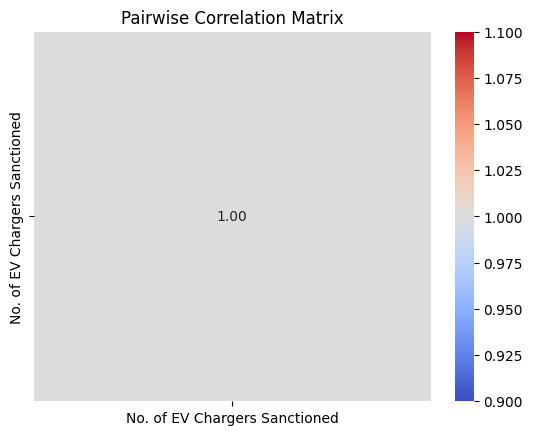

In [16]:
# Pairwise correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pairwise Correlation Matrix')
plt.show()


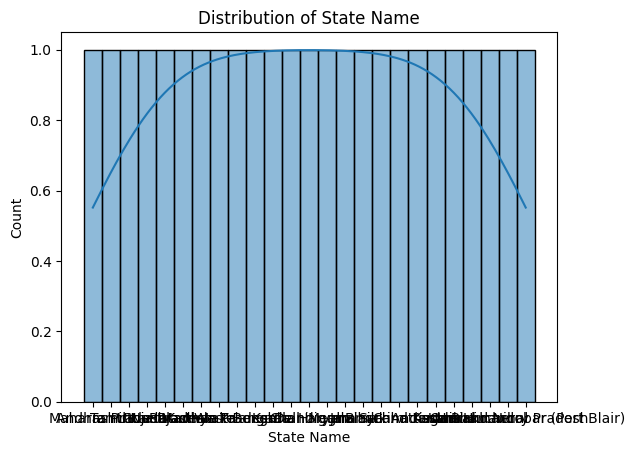

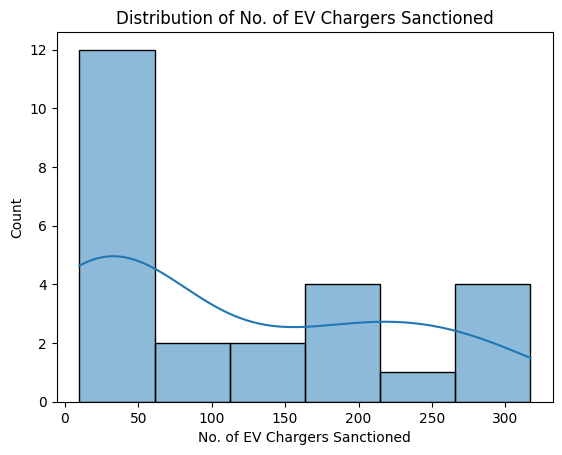

In [17]:
# Univariate distribution plots
for column in df.columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

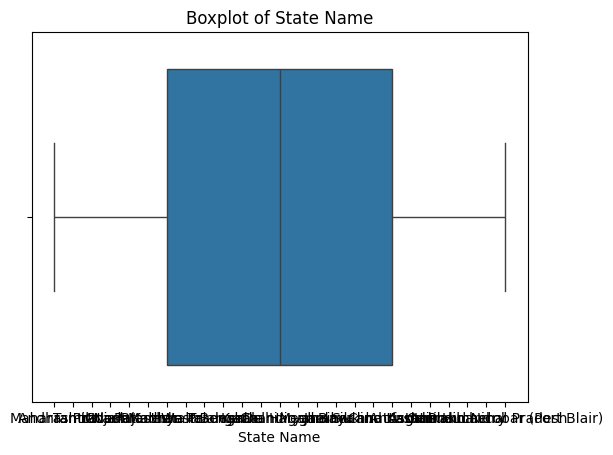

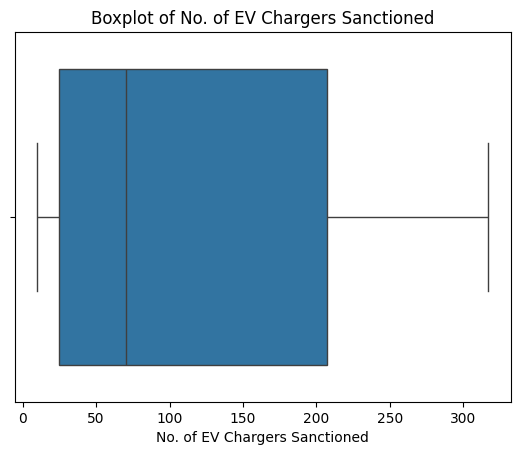

In [18]:
# Box plots for outliers
for column in df.columns:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

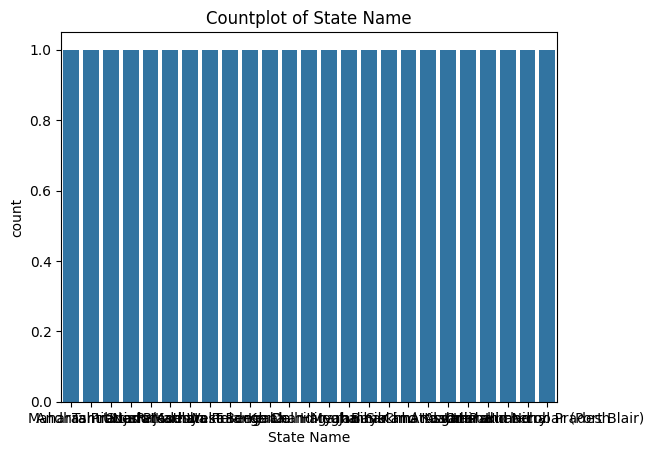

In [19]:
# Categorical variable analysis
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    sns.countplot(x=df[column])
    plt.title(f'Countplot of {column}')
    plt.show()

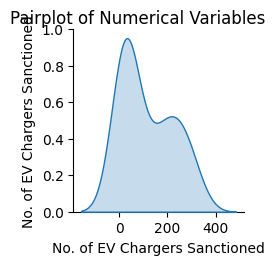

In [20]:
# Scatter plots for numerical variables
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

In [21]:
print(df.dtypes)

State Name                       object
No. of EV Chargers Sanctioned     int64
dtype: object


In [22]:
print(df.columns)
print(df.head())

Index(['State Name', 'No. of EV Chargers Sanctioned'], dtype='object')
       State Name  No. of EV Chargers Sanctioned
0     Maharashtra                            317
1  Andhra Pradesh                            266
2      Tamil Nadu                            281
3         Gujarat                            278
4   Uttar Pradesh                            207


What are the states with the highest number of sanctioned EV chargers?

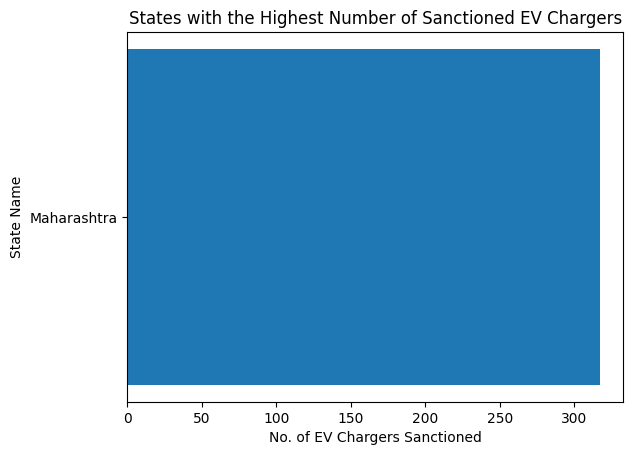

In [23]:
import matplotlib.pyplot as plt

max_chargers_state = df[df['No. of EV Chargers Sanctioned'] == df['No. of EV Chargers Sanctioned'].max()]

plt.barh(max_chargers_state['State Name'], max_chargers_state['No. of EV Chargers Sanctioned'])
plt.xlabel('No. of EV Chargers Sanctioned')
plt.ylabel('State Name')
plt.title('States with the Highest Number of Sanctioned EV Chargers')
plt.show()


States with the Lowest Number of Sanctioned EV Chargers

The state with the lowest number of sanctioned EV chargers is                           State Name  No. of EV Chargers Sanctioned
21                       Uttarakhand                             10
22                        Puducherry                             10
23  Andaman and Nicobar (Port Blair)                             10
24                  Himachal Pradesh                             10.


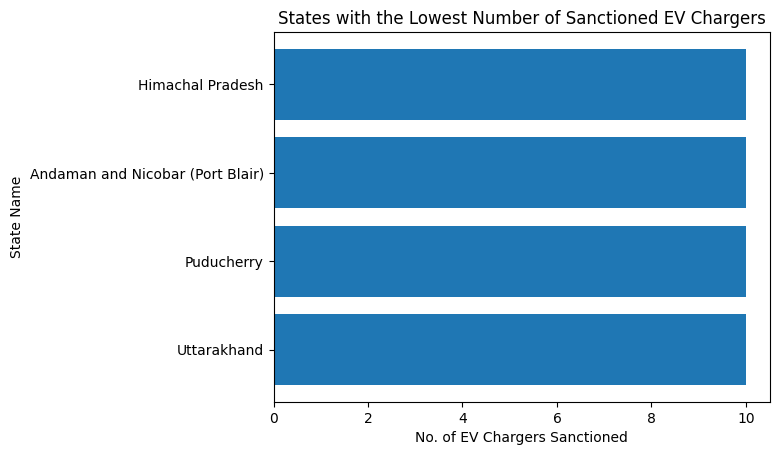

In [24]:
min_chargers_state = df[df['No. of EV Chargers Sanctioned'] == df['No. of EV Chargers Sanctioned'].min()]

print(f"The state with the lowest number of sanctioned EV chargers is {min_chargers_state}.")


plt.barh(min_chargers_state['State Name'], min_chargers_state['No. of EV Chargers Sanctioned'])
plt.xlabel('No. of EV Chargers Sanctioned')
plt.ylabel('State Name')
plt.title('States with the Lowest Number of Sanctioned EV Chargers')
plt.show()


Average Number of Sanctioned EV Chargers Across States

The average number of sanctioned EV chargers across all states is 115.08.


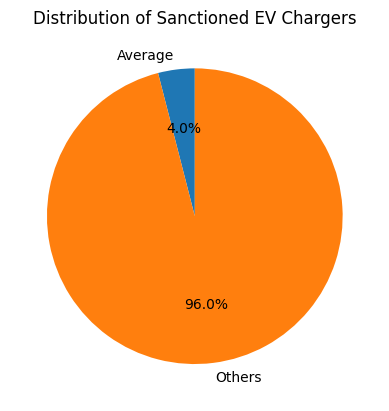

In [25]:
average_chargers = df['No. of EV Chargers Sanctioned'].mean()
print(f"The average number of sanctioned EV chargers across all states is {average_chargers:.2f}.")
plt.pie([average_chargers, df['No. of EV Chargers Sanctioned'].sum() - average_chargers],
        labels=['Average', 'Others'],
        autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sanctioned EV Chargers')
plt.show()



Number of States with Zero Sanctioned EV Chargers

The number of states with zero sanctioned EV chargers is 0.


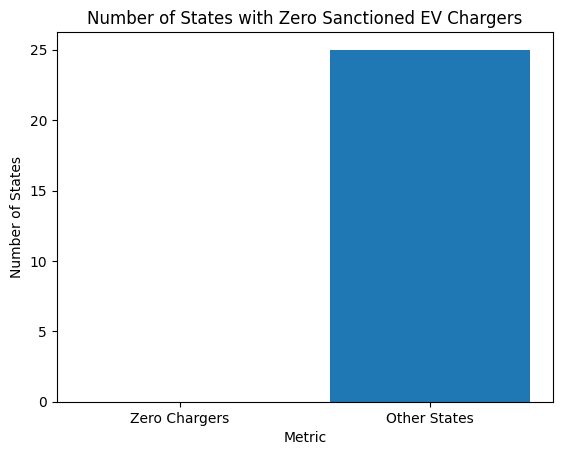

In [26]:
zero_chargers_states = df[df['No. of EV Chargers Sanctioned'] == 0]['State Name'].tolist()
print(f"The number of states with zero sanctioned EV chargers is {len(zero_chargers_states)}.")
plt.bar(['Zero Chargers', 'Other States'], [len(zero_chargers_states), len(df) - len(zero_chargers_states)])
plt.xlabel('Metric')
plt.ylabel('Number of States')
plt.title('Number of States with Zero Sanctioned EV Chargers')
plt.show()

In [27]:
# Market Size
total_market_size = df['No. of EV Chargers Sanctioned'].sum()
print(f"Overall market size for EV chargers: {total_market_size}")

Overall market size for EV chargers: 2877


In [28]:
df.set_index('State Name', inplace=True)

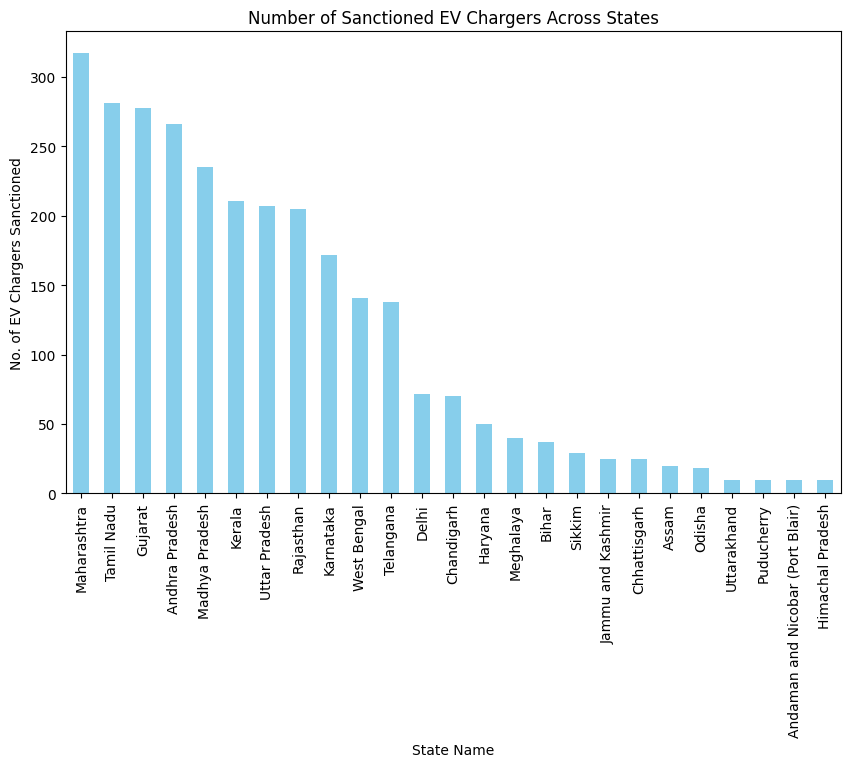

In [29]:
# Question 2: Regional Disparities
plt.figure(figsize=(10, 6))
df['No. of EV Chargers Sanctioned'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.xlabel('State Name')
plt.ylabel('No. of EV Chargers Sanctioned')
plt.title('Number of Sanctioned EV Chargers Across States')
plt.show()

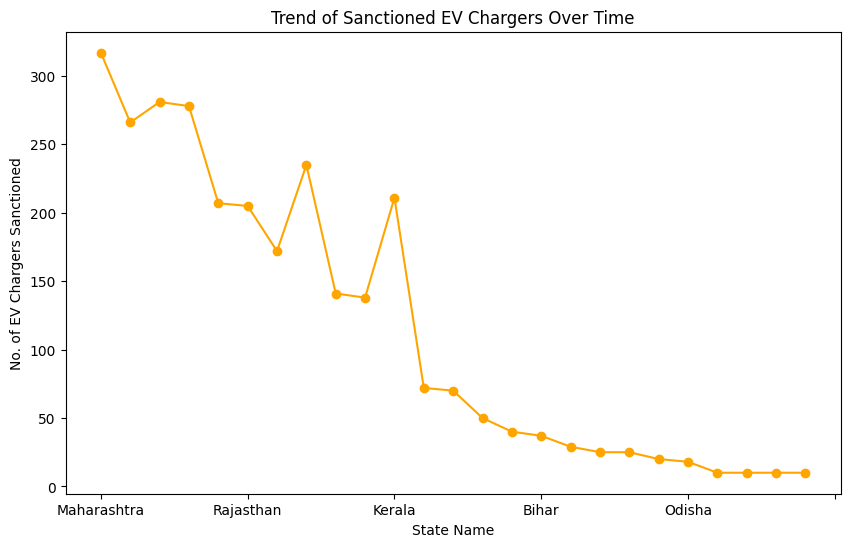

In [30]:
# Question 3: Market Trends
plt.figure(figsize=(10, 6))
df['No. of EV Chargers Sanctioned'].plot(kind='line', marker='o', color='orange')
plt.xlabel('State Name')
plt.ylabel('No. of EV Chargers Sanctioned')
plt.title('Trend of Sanctioned EV Chargers Over Time')
plt.show()

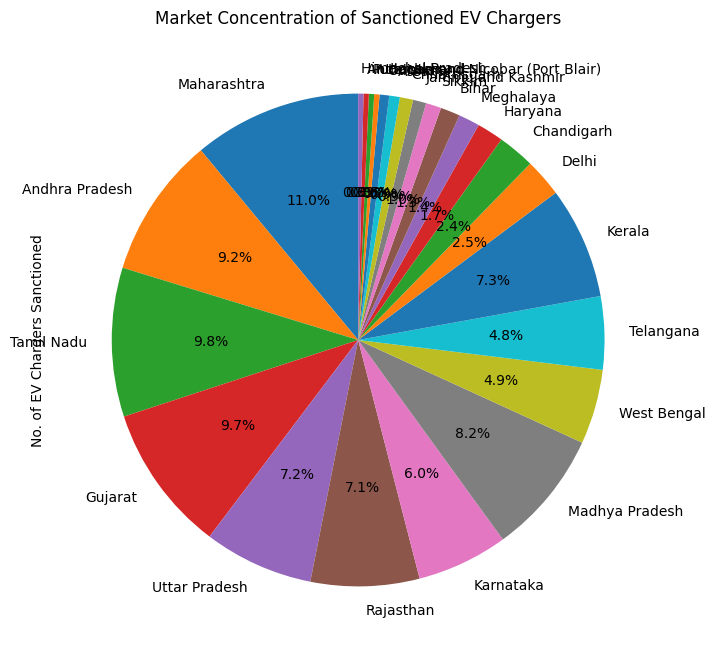

In [31]:
# Question 5: Market Concentration
plt.figure(figsize=(8, 8))
df['No. of EV Chargers Sanctioned'].plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Market Concentration of Sanctioned EV Chargers')
plt.show()

In [32]:
# Select relevant features for clustering
features = df[['No. of EV Chargers Sanctioned']]

In [33]:

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [34]:
# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

In [35]:
pip install kneed

In [36]:
from kneed import KneeLocator

In [37]:
# Use KneeLocator to find the optimal number of clusters
knee_locator = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

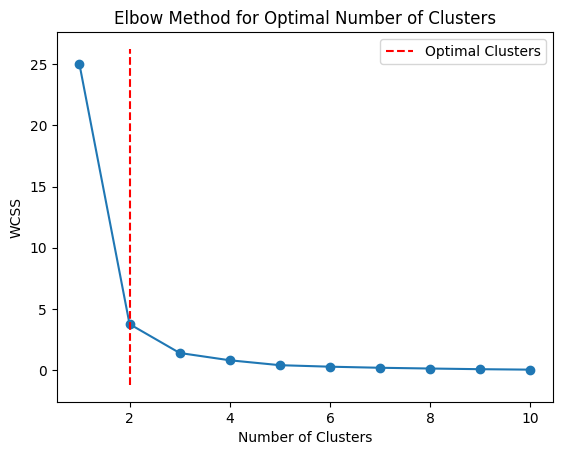

In [38]:
# Plot the Elbow method with the optimal number of clusters
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.vlines(optimal_clusters, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red', label='Optimal Clusters')
plt.legend()
plt.show()

In [39]:
# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_features)

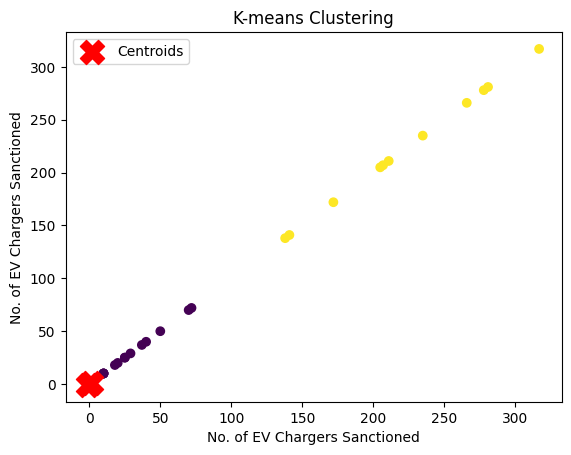

In [40]:
# Visualize the clusters
plt.scatter(df['No. of EV Chargers Sanctioned'], df['No. of EV Chargers Sanctioned'], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 0], s=300, marker='X', c='red', label='Centroids')
plt.xlabel('No. of EV Chargers Sanctioned')
plt.ylabel('No. of EV Chargers Sanctioned')
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [41]:
# Display the count of samples in each cluster
print(df['Cluster'].value_counts())

0    14
1    11
Name: Cluster, dtype: int64


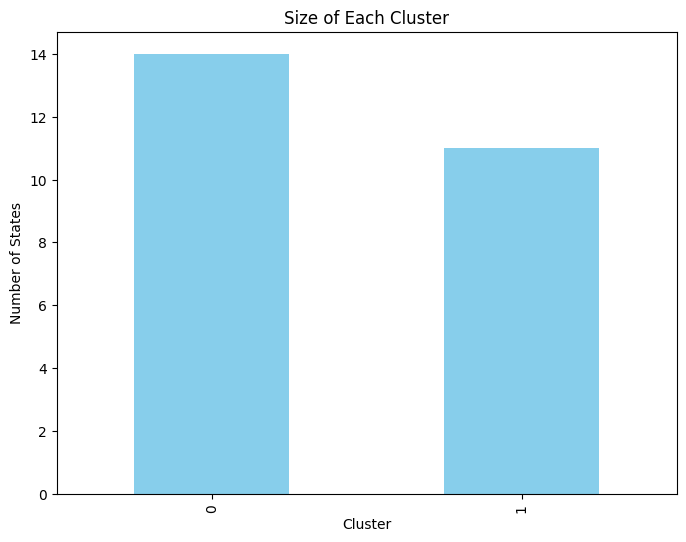

In [42]:
# Question 2: Size of Segments - Bar Chart
segment_sizes = df['Cluster'].value_counts()
plt.figure(figsize=(8, 6))
segment_sizes.sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of States')
plt.title('Size of Each Cluster')
plt.show()

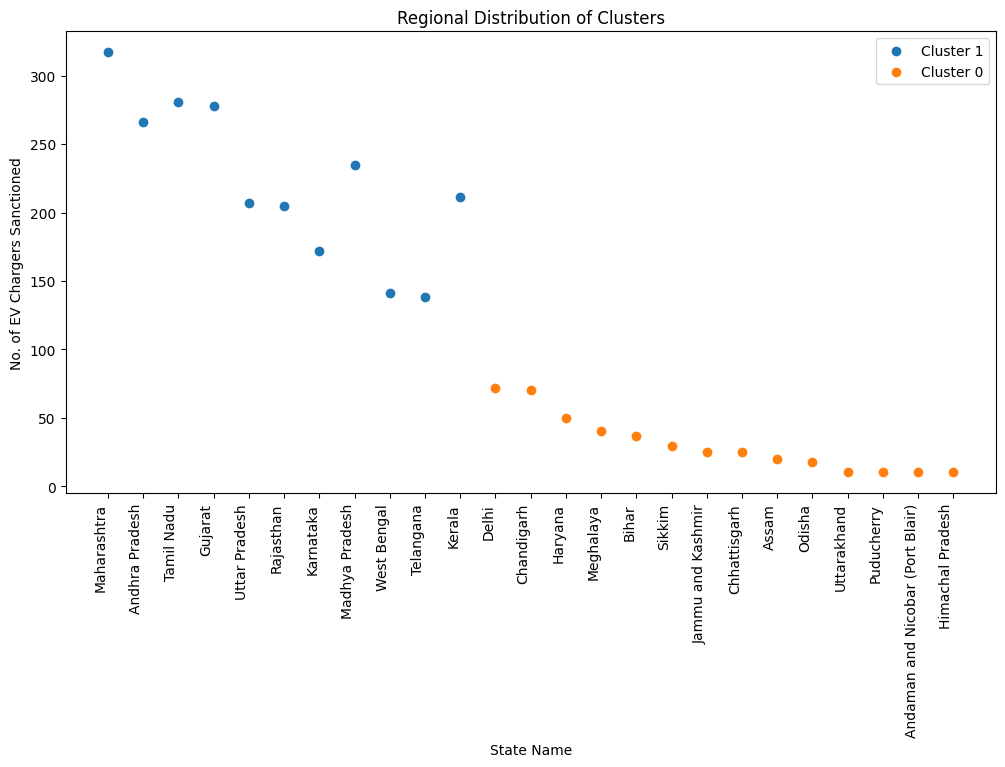

In [43]:
# Question 3: Regional Distribution - Scatter Plot
plt.figure(figsize=(12, 6))
for cluster in df['Cluster'].unique():
    cluster_states = df[df['Cluster'] == cluster]
    plt.scatter(cluster_states.index, cluster_states['No. of EV Chargers Sanctioned'], label=f'Cluster {cluster}')

plt.xlabel('State Name')
plt.ylabel('No. of EV Chargers Sanctioned')
plt.title('Regional Distribution of Clusters')
plt.legend()
plt.xticks(rotation=90, ha='right')
plt.show()

What are the key characteristics of each market segment?


<Figure size 1000x600 with 0 Axes>

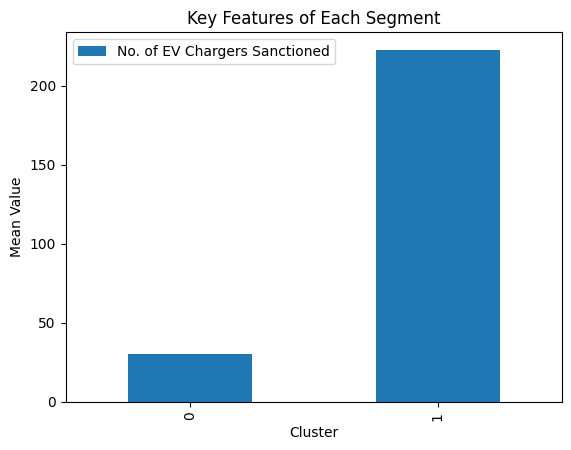

In [44]:
# Question 5: Key Features of Each Segment - Bar Chart
key_features = df.groupby('Cluster').mean()
plt.figure(figsize=(10, 6))
key_features.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.title('Key Features of Each Segment')
plt.show()

What is the distribution of clusters across different states?

Are there specific states that predominantly belong to a particular cluster?

How do the total vehicle counts differ among the clusters?

Is there a correlation between the total number of electric vehicles and non-electric vehicles within each cluster?

In [45]:

# Group by cluster and calculate basic statistics
cluster_descriptions = df.groupby('Cluster').describe()

# Display the cluster descriptions
print(cluster_descriptions)

        No. of EV Chargers Sanctioned                                       \
                                count        mean        std    min    25%   
Cluster                                                                      
0                                14.0   30.428571  21.132237   10.0   12.0   
1                                11.0  222.818182  58.729581  138.0  188.5   

                               
           50%     75%    max  
Cluster                        
0         25.0   39.25   72.0  
1        211.0  272.00  317.0  
